# Rules for programming homeworks

## Format

We currently accept code in 

- Python (`*.py`)
- Julia (`*.jl`)
- MATLAB (`*.m`)
- Jupyter Notbooks (`*.ipynb`)

Please also tell us what environment you are running (e.g. Python/Julia/MATLAB version, package(s)/toolbox). Providing dependency info is encouraged (e.g. `requirements.txt` for pip / `environment.yml` for conda / `Project.toml` and `Manifest.toml` for Julia). **Reproducibility matters**.

## Uploading your assignments

- Please upload your assignments to the assignment section in NTU COOL (<https://cool.ntu.edu.tw/>).
- Please upload other parts (text, math expressions, figures) along with the code if needed. NTU COOL supports uploading multiple files at once.
- Please make sure the files and the links are valid. Broken ones will receive *no credit*.
- Email TA if you have technical problems (no access, cannot upload, etc.)
- Please **do not** upload your HWs to CEIBA since it's being deprecated.

## Credits (Scores)

You will receive full credit (in the programming part) if the code reproduces desirable output
- Wrong numbers / figures due to slight errors in the code = partial credit
- Wrong numbers / figures + spaghetti code that TA/Prof cannot reporduce = no credit
- No code = no credit
- Late HW = no credit


# Homework 1: Solving an ODE

Given an ordinary differential equation:

$$
\frac{d}{dt}x(t) = cos(t)
$$

with initial condition $x(0)=0.0$

## Part 1: Julia's ODE solver

Please **solve** the ODE using `DifferentialEquations.jl` for $t \in [0.0, 4 \pi]$ and **plot** the time series. **Compare** it to the analytical solution *in one plot*.

## Part 2: The forward Euler method

Please **try** a range of dts to **solve** the ODE using the (home-made) forward Euler method for $t \in [0.0, 4 \pi]$, **plot** the time series, and **compare** them to the analytical solution *in one plot*.

**About the math**

In each step, the next state variables ($\vec{u}_{n+1}$) is accumulated by the product of the size of time step (dt) and the derivative at the current state ($\vec{u}_{n}$):

$$ 
\vec{u}_{n+1} = \vec{u}_{n} + dt \cdot f(\vec{u}_{n}, t_{n})
$$

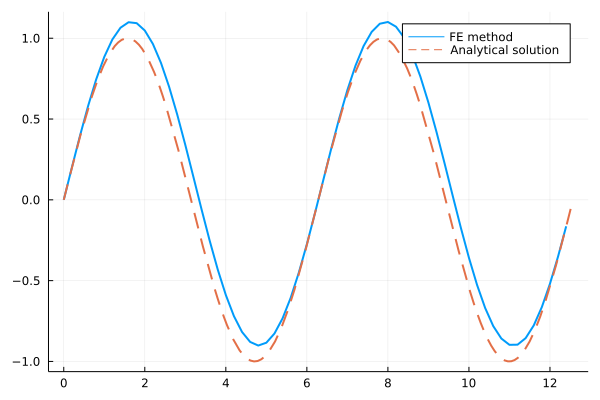

In [5]:
# The ODE model. Exponential decay in this example
# The input/output format is compatible to Julia DiffEq ecosystem AND YOU SHOULD KEEP IT.
model(u, p, t) = cos(t)

# Forward Euler stepper 
step_euler(model, u, p, t, dt) = u .+ dt .* model(u, p, t)

# In house ODE solver
function mysolve(model, u0, tspan, p; dt=0.1, stepper=step_euler)
    # Time points
    ts = tspan[1]:dt:tspan[end]
    # State variable at those time points
    us = zeros(length(ts), length(u0))
    # Initial conditions
    us[1, :] .= u0
    # Iterations
    for i in 1:length(ts)-1
        us[i+1, :] .= stepper(model, us[i, :], p, ts[i], dt)
    end
    # Results
    return (t = ts, u = us)
end

tspan = (0.0, 4.0π)
p = nothing
u0 = 0.0

sol = mysolve(model, u0, tspan, p, dt=0.2, stepper=step_euler)

# Visualization
using Plots
Plots.gr(lw=2)

# Numerical solution
plot(sol.t, sol.u, label="FE method")
plot!(sin, tspan..., label = "Analytical solution", linestyle=:dash)

## Part 3: The RK4 method

1. Please **try** a range of dts to **solve** the ODE using the (home-made) fourth order Runge-Kutta ([RK4](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)) method for $t \in [0.0, 4 \pi]$, **plot** the time series, and **compare** them to the analytical solution *in one plot*.
2. Compared to the forward Eular method, which one is more efficient? (In terms of 
time step needewd for the same accuracy)

**About the math**

In each iteration, the next state is calculated in 5 steps.

$$
\begin{align}
k_1 &= dt \cdot f(\vec{u}_{n}, t_n)  \\
k_2 &= dt \cdot f(\vec{u}_{n} + 0.5k_1, t_n + 0.5dt)  \\
k_3 &= dt \cdot f(\vec{u}_{n} + 0.5k_2, t_n + 0.5dt)  \\
k_4 &= dt \cdot f(\vec{u}_{n} + k_3, t_n + dt)  \\
u_{n+1} &= \vec{u}_{n} + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align}
$$

Hint: replace the Euler stepper with the RK4 one

```julia
# Forward Euler stepper 
step_euler(model, u, p, t, dt) = u .+ dt .* model(u, p, t)
# Your RK4 version
step_rk4(model, u, p, t, dt) = """TODO"""
```